In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("gss_assignment2_data.csv")

In [3]:
data

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
...,...,...
87564,88182,HTML/CSS;Java;JavaScript
87565,88212,HTML/CSS;JavaScript;Python
87566,88282,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;W...
87567,88377,HTML/CSS;JavaScript;Other(s):


In [4]:
data.head()

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [5]:
diller = data.LanguagesWorkedWith.str.split(";")
diller
# her bir satırda yer alan farklı dilleri işleme alabilmek için
# seperator ile her bir dili liste elemanı yaptık. 

0                     [HTML/CSS, Java, JavaScript, Python]
1                                  [C++, HTML/CSS, Python]
2                                               [HTML/CSS]
3                                [C, C++, C#, Python, SQL]
4        [C++, HTML/CSS, Java, JavaScript, Python, SQL,...
                               ...                        
87564                         [HTML/CSS, Java, JavaScript]
87565                       [HTML/CSS, JavaScript, Python]
87566    [Bash/Shell/PowerShell, Go, HTML/CSS, JavaScri...
87567                    [HTML/CSS, JavaScript, Other(s):]
87568    [Bash/Shell/PowerShell, HTML/CSS, Java, JavaSc...
Name: LanguagesWorkedWith, Length: 87569, dtype: object

In [6]:
# 87568 satırda yer alan ve her biri liste olan her bir satırdaki listelerde yer alan dilleri
# unique hale getirdik
unique = set([j for i in diller for j in i])

In [7]:
unique = list(unique)
unique

['Ruby',
 'Elixir',
 'SQL',
 'Scala',
 'Clojure',
 'TypeScript',
 'C',
 'JavaScript',
 'Java',
 'Objective-C',
 'F#',
 'VBA',
 'C#',
 'C++',
 'Dart',
 'WebAssembly',
 'Python',
 'Go',
 'Other(s):',
 'Assembly',
 'Swift',
 'R',
 'Erlang',
 'Bash/Shell/PowerShell',
 'Kotlin',
 'Rust',
 'HTML/CSS',
 'PHP']

In [8]:
# sebebini bilmediğim bir neden ötürü "C++" str.contains("C++") içinde hata veriyor.
#çözüm sağlandı. "c++" ifadesini regex olarak tanıdığı için hata veriyor. regex = False
# ile bu sorunu çözmüş olduk. 

In [9]:
for i in unique:
    print(data.LanguagesWorkedWith.str.contains(i, regex=False).sum())
#her bir programlama dilinin kaç defa geçtiğini görmüş olduk. 

7331
1260
47544
3309
1254
18523
71988
59219
70113
4191
973
4781
27097
20524
1683
1015
36443
7201
7920
6547
5744
13947
777
31991
5620
2794
55466
23030


In [10]:
# programlama dillerinin sayılarından ve isimlerinden Series oluşturalım

In [11]:
unique_dict = {i: data.LanguagesWorkedWith.str.contains(i, regex=False).sum() for i in unique}
#dict oluşturduk

In [12]:
unique_dict

{'Ruby': 7331,
 'Elixir': 1260,
 'SQL': 47544,
 'Scala': 3309,
 'Clojure': 1254,
 'TypeScript': 18523,
 'C': 71988,
 'JavaScript': 59219,
 'Java': 70113,
 'Objective-C': 4191,
 'F#': 973,
 'VBA': 4781,
 'C#': 27097,
 'C++': 20524,
 'Dart': 1683,
 'WebAssembly': 1015,
 'Python': 36443,
 'Go': 7201,
 'Other(s):': 7920,
 'Assembly': 6547,
 'Swift': 5744,
 'R': 13947,
 'Erlang': 777,
 'Bash/Shell/PowerShell': 31991,
 'Kotlin': 5620,
 'Rust': 2794,
 'HTML/CSS': 55466,
 'PHP': 23030}

In [13]:
unique_df = pd.Series(unique_dict)

In [14]:
unique_df.sort_values(inplace=True)

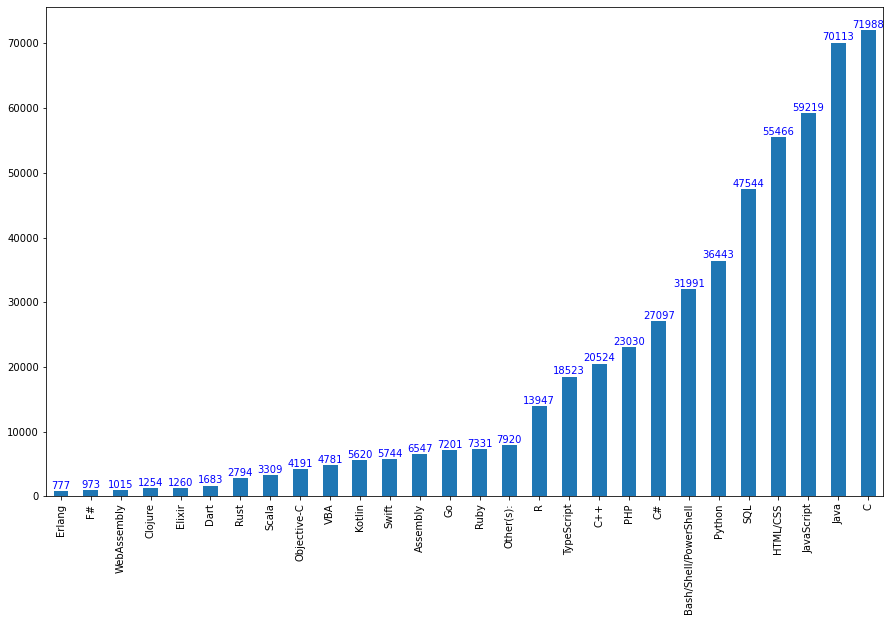

In [15]:
plt.figure(figsize=(15,9))
unique_df.plot(kind = "bar")
for index, value in enumerate(unique_df.values):
    plt.text(index, value+30, str(value), ha = "center", va= "bottom",c = "blue")


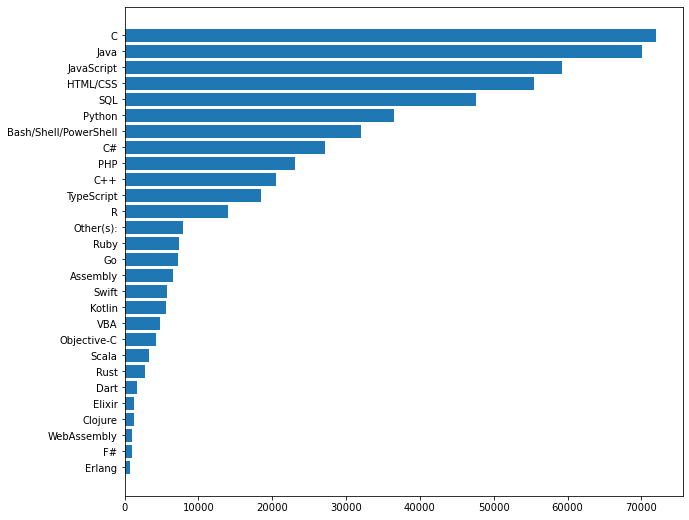

In [16]:
fig, ax = plt.subplots(figsize = (10,9))
plt.barh(unique_df.index, unique_df.values);


In [17]:
unique_df.describe()

count       28.000000
mean     19224.464286
std      22370.764582
min        777.000000
25%       3180.250000
50%       7266.000000
75%      28320.500000
max      71988.000000
dtype: float64

In [21]:
df = pd.DataFrame(unique_df, columns=["Tercih Sayısı"])
df

,Tercih Sayısı
Erlang,777
F#,973
WebAssembly,1015
Clojure,1254
Elixir,1260
Dart,1683
Rust,2794
Scala,3309
Objective-C,4191
VBA,4781


C:\Users\MTM\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


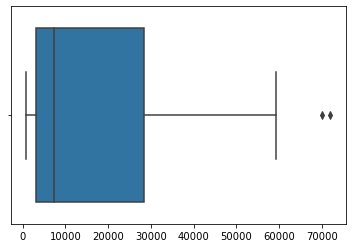

In [19]:
sns.boxplot(unique_df);

C:\Users\MTM\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


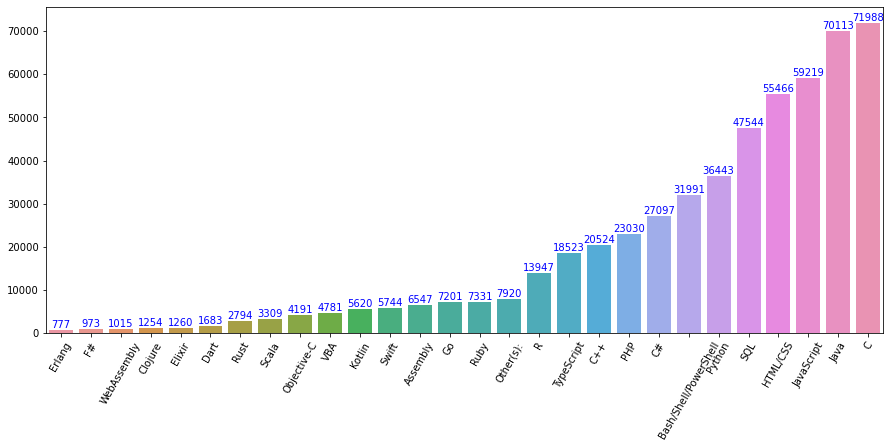

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(unique_df.index, unique_df.values)
plt.xticks(rotation = 60);
for index, value in enumerate(unique_df.values):
    plt.text(index, value+30, str(value), ha = "center", va= "bottom",c = "blue")